### Final project submission
* Name: Kezia Setokusumo
* Pace: Flex
* Scheduled Project Review: Nov 17, 2023
* Instructor: Mark Barbour

### Overview and problem statement
Modeling credit risk is an extremely important task for many lenders and financial institutions. Accurate credit risk assessment helps lenders evalute potential customers and helps firms assess their portfolio's risk exposure. The goal of this project is to use maching learning algorithms to build a model that correctly predicts if a given customer will default on their loan and identifies the most relevant features.

### The data
The file `credit_risk_dataset.csv` contains the credit history of customers who have taken out a loan. Using this dataset, we will build a tool that predicts whether a given customer will default or not default. The original dataset contains 32,581 rows and 12 columns. The columns are:
* `person_age`: Age

* `person_income`: Annual Income

* `person_home_ownership`: Home ownership

* `person_emp_length`:Employment length (in years)

* `loan_intent`: Loan intent

* `loan_grade`: Loan grade

* `loan_amnt`: Loan amount

* `loan_int_rate`: Interest rate

* `loan_status`: Loan status (0 is non-default 1 is default)

* `loan_percent_income`: Percent income

* `cb_person_default_on_file`: Historical default

* `cb_preson_cred_hist_length`:	Credit history length

The column `loan_status` will serve as the target variable in our analysis. The target variable's unique values are 0 and 1. A value of 0 denotes non-default and a value of 1 denotes default.

### Data and analysis reproducibility
For users who don't have the relevant Python libraries nor the dataset, this section includes code that will automatically download the required spreadsheet and install the required libraries.

By running the following cells, we create a new environment called 'credit-analysis' containing the required packages for the notebook to run.

In [2]:
# create a new environment
conda create --name credit-analysis notebook scikit-learn matplotlib seaborn pandas opendatasets numpy -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/keziasetokusumo/opt/anaconda3/envs/credit-analysis

  added / updated specs:
    - matplotlib
    - notebook
    - numpy
    - pandas
    - scikit-learn
    - seaborn


The following NEW packages will be INSTALLED:

  anyio              pkgs/main/osx-64::anyio-3.5.0-py310hecd8cb5_0 None
  appnope            pkgs/main/osx-64::appnope-0.1.2-py310hecd8cb5_1001 None
  argon2-cffi        pkgs/main/noarch::argon2-cffi-21.3.0-pyhd3eb1b0_0 None
  argon2-cffi-bindi~ pkgs/main/osx-64::argon2-cffi-bindings-21.2.0-py310hca72f7f_0 None
  asttokens          pkgs/main/noarch::asttokens-2.0.5-pyhd3eb1b0_0 None
  attrs              pkgs/main/osx-64::attrs-23.1.0-py310hecd8cb5_0 None
  backcall           pkgs/main/noarch::backcall-0.2.0-pyhd3eb1b

Preparing transaction: done
Verifying transaction: done
Executing transaction: / 

    Installed package of scikit-learn can be accelerated using scikit-learn-intelex.
    More details are available here: https://intel.github.io/scikit-learn-intelex

    For example:

        $ conda install scikit-learn-intelex
        $ python -m sklearnex my_application.py

    

done
#
# To activate this environment, use
#
#     $ conda activate credit-analysis
#
# To deactivate an active environment, use
#
#     $ conda deactivate

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
# activate the new environment
!conda activate credit-analysis

Now we've created and activated a new kernel environment.

By running the cell below, we can subsequently use the kaggle API to download the dataset and pass it into a pandas dataframe for processing.

In [1]:
# import relevant libraries
import opendatasets as od
import pandas

# download the dataset
od.download("https://www.kaggle.com/datasets/laotse/credit-risk-dataset")

100%|████████████████████████████████████████████████████████████████████████| 368k/368k [00:00<00:00, 3.20MB/s]

Now that we've gathered the data and relevant packages, we can kick off data exploration, cleaning, and preprocessing procedures.

### Exploratory data analysis, cleaning, and preprocessing
First, we'll pass the loan dataset into a pandas dataframe and display the first five rows to get an idea of what we can use.

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np

# read the downloaded file and pass it into a dataframe
file = ('credit-risk-dataset/credit_risk_dataset.csv')
data = pd.read_csv(file)

# display the first five rows to preview the dataset
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


The info() method shows us the data type of each column and the number of non-null rows.

In [2]:
# inspect the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


The first thing we should do is check for any invalid values. By using isna().sum(), we can count the number of invalid entries per column.

In [3]:
# check for any columns with null values
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

`loan_int_rate` has several null values, which we need to address. We'll use the describe() method to look at the column's data distribution and see if there's anything we can use to replace the empty rows.

In [4]:
# use describe() on interest rate column
data['loan_int_rate'].describe()

count    29465.000000
mean        11.011695
std          3.240459
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

Using the describe() method, we can see that the average interest rate for this dataset is 11.01%. This is aligned with data from [Bankrate.com](https://www.bankrate.com/loans/personal-loans/average-personal-loan-rates/), which records that the average personal loan rate is 11.31% (as of September 2023). Based on this, we'll replace the null values in the `loan_int_rate` column with the mean 11.01% from the dataset.

In [5]:
# fill the null values in the interest rate column with thet average interest rate
data['loan_int_rate']=data['loan_int_rate'].fillna(value=11.01)

The `loan_int_rate` column shouldn't have any null rows left. We can check for this.

In [6]:
# check that we got rid of the null entries
data.isna().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

Now, we can move on to address `person_emp_length` null values. 

Length of employment tends to be an important indicator when predicting default likelihood. To fill a given null value, we'll use the given customer's age and fill the empty cell with the average number of years someone of that age has worked for. We'll start by looking at the `person_age` column and calling the value_counts() method to see how many unique ages we have in our dataset.

In [7]:
# check the data distribution of the 'person_age' column
data['person_age'].value_counts()

23     3889
22     3633
24     3549
25     3037
26     2477
27     2138
28     1854
29     1687
30     1316
21     1229
31     1142
32      964
33      856
34      709
35      620
36      548
37      478
38      373
39      302
40      271
41      241
42      188
43      164
44      141
45      108
46       94
47       94
48       75
50       52
49       49
51       39
52       36
53       30
54       24
55       20
58       19
56       15
57       15
20       15
60       15
65        9
66        9
61        9
70        7
64        7
62        7
59        5
69        5
144       3
73        3
63        3
123       2
78        1
94        1
80        1
84        1
76        1
67        1
Name: person_age, dtype: int64

Now that we have an idea of the ages represented, we'll pull the average number of years someone of X years old has worked for.

In [8]:
# create a table called 'grouped' that groups the dataset by age
# display the average employment length of someone that age
grouped=data.groupby('person_age').mean()
grouped.reset_index(inplace=True)
grouped['person_emp_length']=round(grouped['person_emp_length'], 0)
grouped.rename(columns={'person_emp_length': 'avg_length_by_age'}, inplace=True)
grouped = grouped[['person_age', 'avg_length_by_age']]

# display the first five rows
grouped.head()

,person_age,avg_length_by_age
0,20,3.0
1,21,3.0
2,22,4.0
3,23,4.0
4,24,4.0


We'll use the table to create a dictionary and map the values to remove the null values in `person_emp_length`.

In [9]:
# create a dictionary by zipping the 'grouped' table
age_dict = dict(zip(grouped['person_age'], grouped['avg_length_by_age']))

In [10]:
# fill the null values in 'person_emp_length' based on 'age_dict'
data.loc[data['person_emp_length'].isnull(), 'person_emp_length'] = data['person_age'].map(age_dict)

Verify that we have no more null values.

In [11]:
# check that we got rid of the null entries
data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

The dataset contains some columns that store categorical data. We'll generate dummy variables so we can model the categorical information.

In [12]:
# assign numerical values to categorical data with the get_dummies() method
# define the 'drop_first' parameter so we avoid multicollinearity
data = pd.get_dummies(data, drop_first=True)

After addressing null values and transforming our categorical columns, we'll look at the `loan_status` column to get an idea of the target's data distribution.

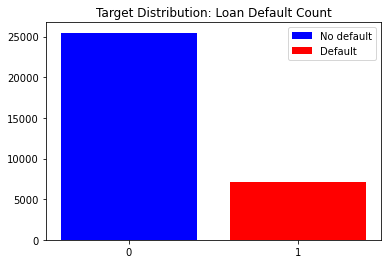

In [13]:
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

# use the value_counts() method on the target column to get the label and corresponding number of observations
status=list(data['loan_status'].value_counts().index)
count=list(data['loan_status'].value_counts().values)

# plot the distribution
ax=plt.subplot()
ax.bar(status[0], count[0], color='blue', label='No default')
ax.bar(status[1], count[1], color='red', label='Default')
ax.set_title('Target Distribution: Loan Default Count')
plt.legend()
plt.xticks(status)
plt.show()

Our target column, `loan_status`, isn't evenly distributed. There are far more entries for 'no default' customers than 'default' customers. We'll address this issue later on in the modeling section.

We can also look at the data distribution of all the other columns in our dataset.

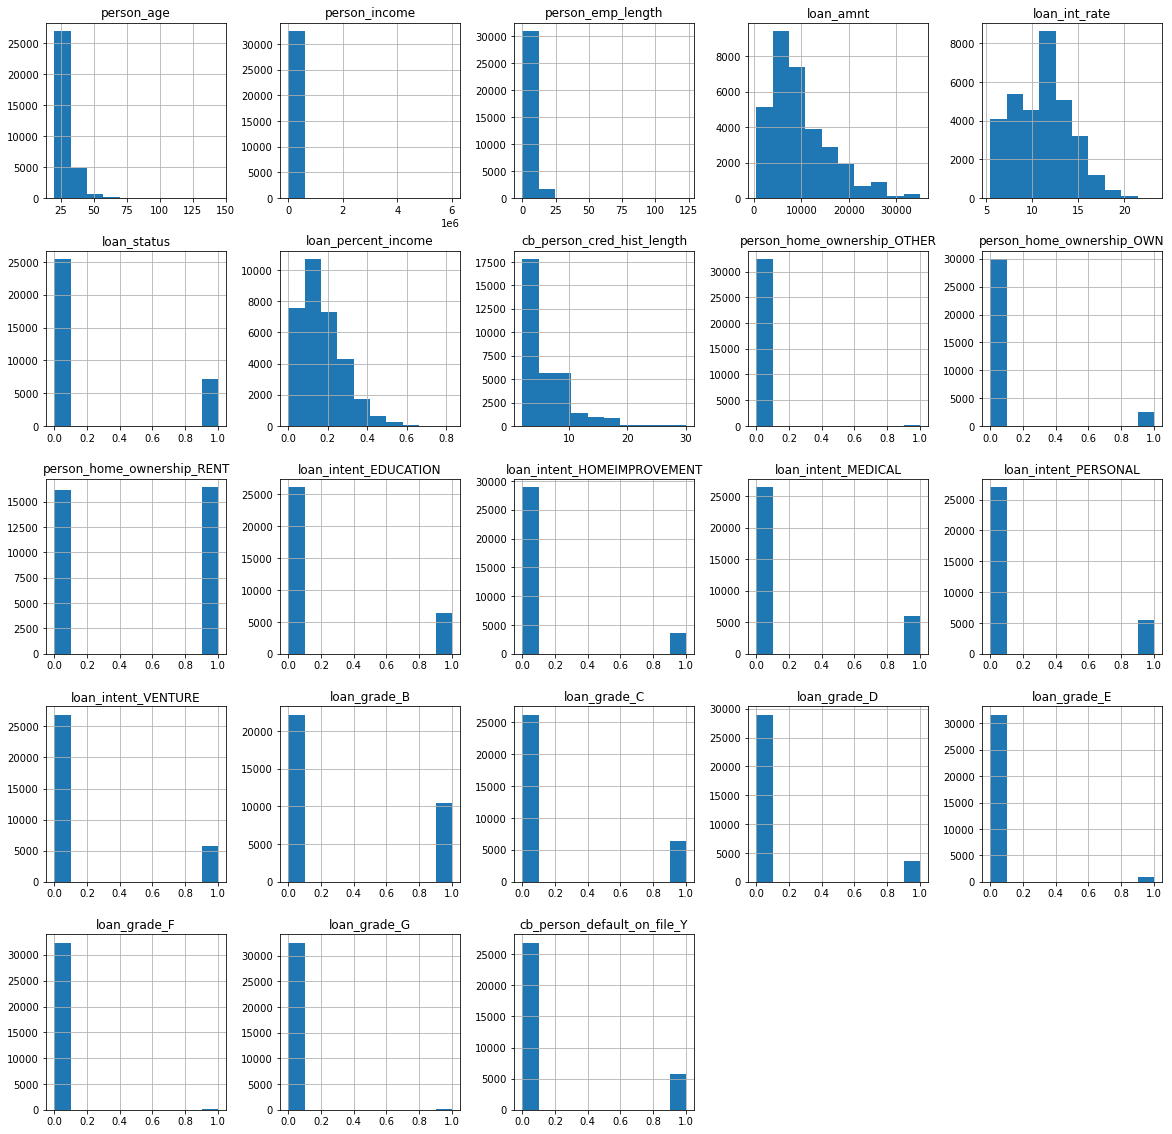

In [14]:
# plot the distribution for each column in the dataset
ax = data.hist(figsize=(20,20))

One common issue is multicollinearity, when two or more predictor variables are related. To get an idea of the correlations between variables, we'll create a correlation matrix below.

Text(0.5, 1.0, 'Correlation Heatmap of Columns')

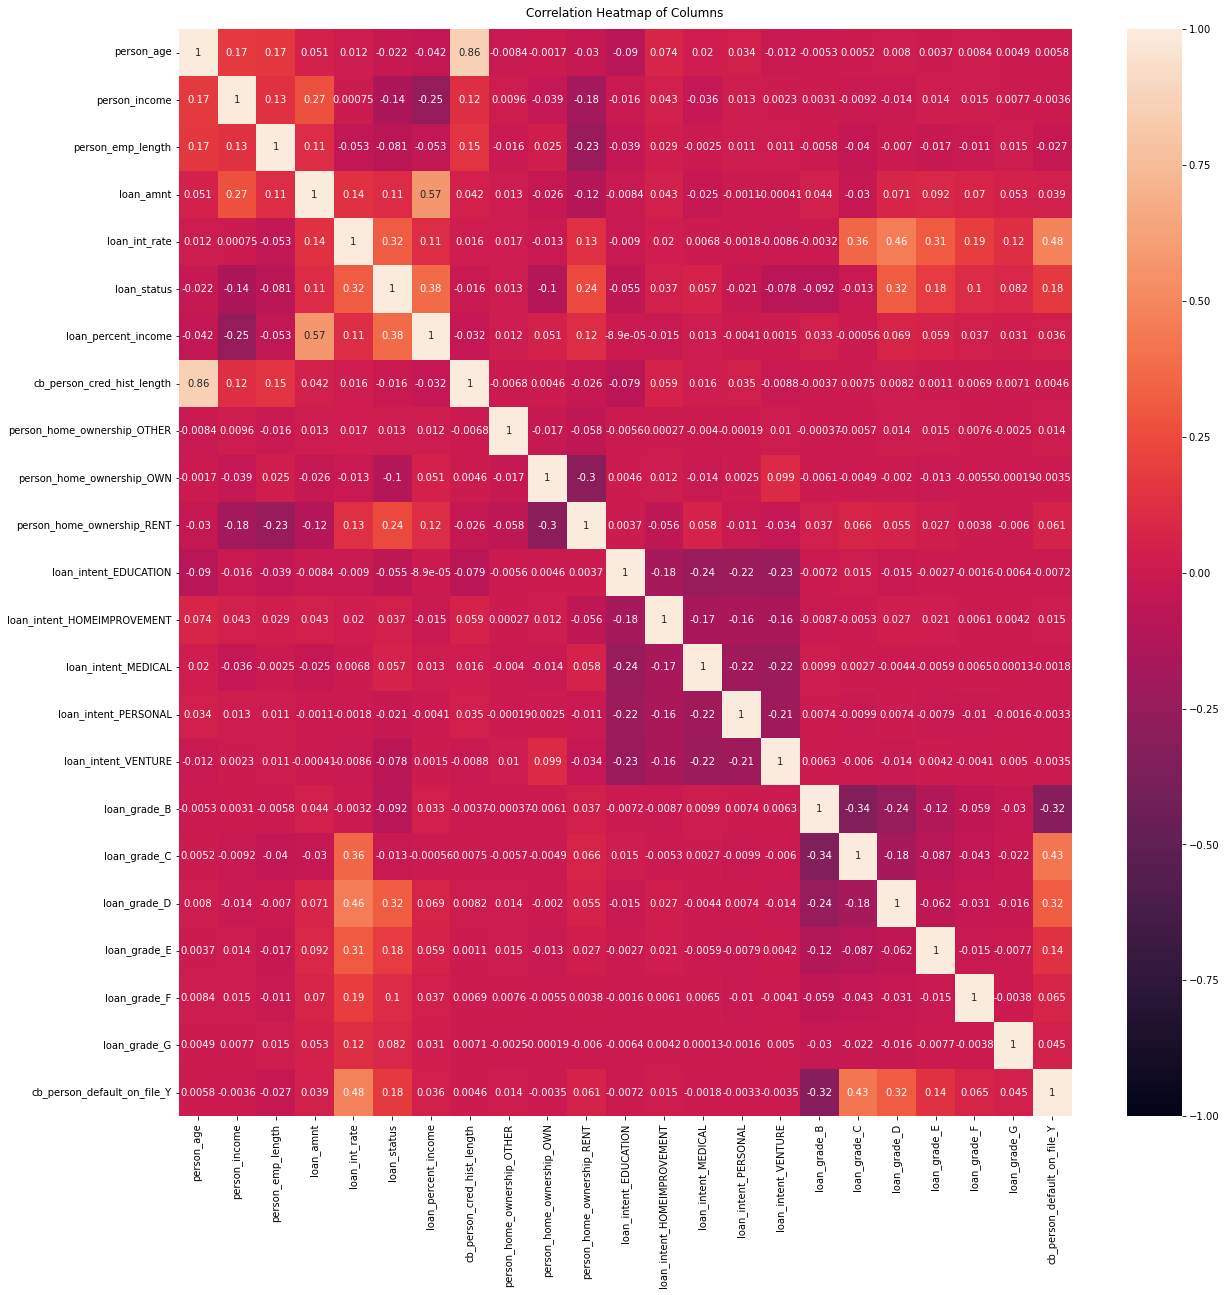

In [15]:
# import relevant libraries
import seaborn as sns

# create a correlation matrix
plt.figure(figsize=(20,20))
corr_heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
corr_heatmap.set_title('Correlation Heatmap of Columns', fontdict={'fontsize':12}, pad=12)

The correlation matrix is quite large, so we'll create a table that lists the combination of variables that have correlations above a certain amount. For this dataset, we'll pull combinations with a correlation greater than 80%.

In [16]:
# Define the variable 'df_corr'
df_corr = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Create a column that names the pairs
df_corr['combination'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.drop(['level_0', 'level_1'], axis=1, inplace=True)
df_corr.columns = ['correlation', 'columns tuple']

# Display the pairs that have a correlation greater than 0.96
df_corr[(df_corr['correlation']<1) & (df_corr['correlation']>0.8)].head(1)

,correlation,columns tuple
161,0.859133,"(cb_person_cred_hist_length, person_age)"


A person's age and their credit history length is highly correlated (86%). This makes sense, as most people start getting credit cards and taking out student loans towards the end of high school and the start of college.

We'll drop the `person_age` column and keep `cb_person_cred_hist_length`, as the latter seems a bit more relevant for this analysis.

In [17]:
# drop the 'person_age' column as it's highly correlated with 'cb_person_cred_hist_length' (credit history length)
data = data.drop(['person_age'], axis=1)

To summarize, we've checked for invalid data entries, transformed text/categorical data, inspected data distributions, and addressed highly correlated variables. Below is a table describing our preprocessed, cleaned, and transformed dataset. Going forward, the models we construct will have 22 predictor variables.

In [18]:
# use the describe() method on the entire dataset
data.describe()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
count,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,6.607485e+04,4.788803,9589.371106,11.011533,0.218164,0.170203,5.804211,0.003284,0.079310,0.504773,...,0.186336,0.169455,0.175532,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964,0.176330
std,6.198312e+04,4.087974,6322.086646,3.081605,0.413006,0.106782,4.055001,0.057214,0.270226,0.499985,...,0.389383,0.375159,0.380427,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278,0.381106
min,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.500000e+04,4.000000,8000.000000,11.010000,0.000000,0.150000,4.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We need to split our dataset into training and testing sets. This is done in the next cell.

In [19]:
# import relevant libraries
from sklearn.model_selection import train_test_split

# define X and y
X = data.drop(['loan_status'], axis=1)
y = data['loan_status']

# separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We have training and testing sets, which we can pass into the next few models we run.

### Logistic regression
Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. Common logistic regression uses include modeling a binary outcome, which is suitable for our analysis. In the next cell we instantiate a LogReg model and evaluate it based on several metrics.

In [20]:
# import relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# instantiate a LogisticRegression
logreg = LogisticRegression(random_state=42)

# fit the training data
logreg.fit(X_train, y_train)

# create prediction values using the model
y_pred = logreg.predict(X_test)
target_label = ['no default', 'default']

# evaluate the model with 'classification_report'
print(classification_report(y_test, y_pred, target_names = target_label))

              precision    recall  f1-score   support

  no default       0.80      0.98      0.89      7613
     default       0.74      0.16      0.26      2162

    accuracy                           0.80      9775
   macro avg       0.77      0.57      0.57      9775
weighted avg       0.79      0.80      0.75      9775



Our first run of the LogReg model has an overall accuracy of 80%, which is quite high. However, to reiterate, we saw that our target column isn't evenly distributed. We have far more 'no default' observations than 'default' observations. Hence, if the LogReg model predicted everything to be 'no default', then it would still score quite high on accuracy. To fix this, we'll resample our training data with the SMOTE method and store the output in new variables.

In [21]:
# import relevant libraries
from imblearn.over_sampling import SMOTE

# instantiate a SMOTE
sm = SMOTE(random_state=42)

# resample the data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_train_xm = pd.DataFrame(X_train_sm, columns = X_train.columns)

# check that the data was resampled correctly
y_train_sm.value_counts()

1    17860
0    17860
Name: loan_status, dtype: int64

Now we have an equal number of data points for 0: 'no default' and 1: 'default'. Going forward, we will use the resampled training data in our models.

In [22]:
# fit the resampled training data
logreg.fit(X_train_sm, y_train_sm)

/Users/keziasetokusumo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

We get a warning because the number of iterations reached the limit. We address this by setting the 'max_iter' parameter to 1000 in the cell below.

In [23]:
# instantiate a LogisticRegression with 'max_iter' set to 1000
logreg_sm = LogisticRegression(max_iter=1000, random_state=42)

# fit the resampled training data
logreg_sm.fit(X_train_sm, y_train_sm)

# create prediction values using the model
y_pred = logreg_sm.predict(X_test)

# evaluate the model with 'classification_report'
print(classification_report(y_test, y_pred, target_names = target_label))

              precision    recall  f1-score   support

  no default       0.88      0.86      0.87      7613
     default       0.54      0.57      0.55      2162

    accuracy                           0.80      9775
   macro avg       0.71      0.72      0.71      9775
weighted avg       0.80      0.80      0.80      9775



Another way of evaluating our model is by plotting a receiver operating characteristic curve. An ROC curve is a graphical plot that illustrates the performance of a binary classifier model at varying threshold values. The ROC curve is the plot of the true positive rate against the false positive rate at each threshold setting. The area under the ROC is widely used to measure the accuracy of diagnostic tests. Values close to 1 indicate that the classifier is nearly perfect.

In the next few cells, we define a function to plot the ROC curve and pass our model into the function.

In [24]:
# define a function to plot the roc curve
def roc_curve_func(test, pred, label):
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=label)
    display.plot()
    plt.show()

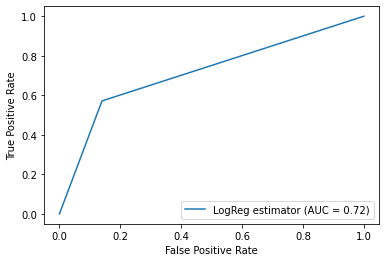

In [25]:
# call the 'roc_curve_func' for the predicted values our model generated
roc_curve_func(y_test, y_pred, 'LogReg estimator')

We have an AUC of 0.72, which isn't too bad for our first run.

However, after resampling our data, we can see that the LogReg model doesn't perform so well when it comes to 'default' observations. From the classification report printout, the precision, recall, and f1-score is 54%, 57%, and 55%, respectively. We'll continue to test with other models.

Before moving on to other model types, we can look at the coefficients for each input variable to get a better understanding of the directional impact that each feature has on the dependent variable `loan_status`. This is one aspect we can take away from our LogReg model.

Input variables with a negative coefficient means that an increase in the variable increases the likelihood that a given observation will be classified as 0: 'no default'. Input variables with a positive coefficient means that an increase in the variable increases the likelihood that a given observation will be classified as 1: 'default'.

In [26]:
# create a list of tuples that contains the feature/column and the corresponding coefficient
column_labels = X_train_sm.columns.tolist()
coef = logreg_sm.coef_.squeeze().tolist()
labels_coef = list(zip(column_labels, coef))

# store the feature names and the coefficients in two different variables
feat_logreg, coef_logreg = zip(*labels_coef)

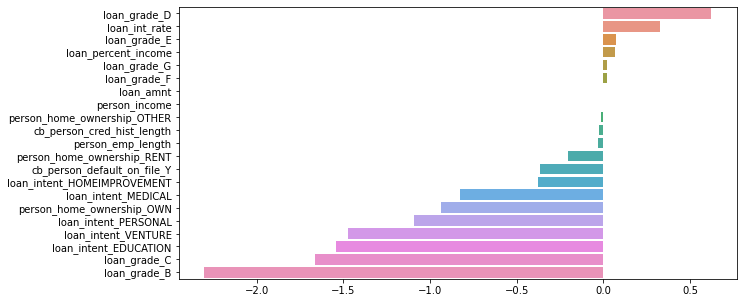

In [27]:
# plot the feature names and coefficients in ascending order
fig, ax = plt.subplots(figsize=(10,5))
logreg_fi = pd.Series(coef_logreg, index = feat_logreg).sort_values(ascending=False)
f = sns.barplot(ax = ax, x = logreg_fi, y = logreg_fi.index)
plt.show()

Though the LogReg model doesn't return the best performance metrics, we can use the above illustration to gauge the directional impact that each feature has on classifying a given data point. The following cell displays the above results in a table.

In [28]:
# display the feature and coefficient results in a dataframe
logreg_feature_df = pd.DataFrame(logreg_fi, columns=['LogReg Coefficient'])
logreg_feature_df

,LogReg Coefficient
loan_grade_D,0.622540
loan_int_rate,0.325748
loan_grade_E,0.073702
loan_percent_income,0.064665
loan_grade_G,0.019347
loan_grade_F,0.018307
loan_amnt,0.000100
person_income,-0.000032
person_home_ownership_OTHER,-0.015869
cb_person_cred_hist_length,-0.026780


We'll revisit the idea of feature importance later.

### K-nearest neighbors
The K-nearest neighbors algorithm is used for classification and regression problems. It's a non-parametric, supervised learning classifier and it uses proximity to predict outcomes. In the next cell, we instantiate a KNeighborsClassifier and evaluate it like how we evaluated our LogReg model.

In [30]:
# import relevant libraries
from sklearn.neighbors import KNeighborsClassifier

# instantiate a KNeighborsClassifier
kNN = KNeighborsClassifier()

# fit the resampled training data
kNN.fit(X_train_sm, y_train_sm)

# create prediction values using the model
y_pred = kNN.predict(X_test)

# evaluate the model with 'classification_report'
print(classification_report(y_test, y_pred, target_names=target_label))

              precision    recall  f1-score   support

  no default       0.89      0.80      0.84      7613
     default       0.48      0.67      0.56      2162

    accuracy                           0.77      9775
   macro avg       0.69      0.73      0.70      9775
weighted avg       0.80      0.77      0.78      9775



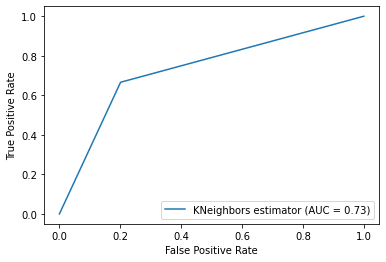

In [31]:
# call the 'roc_curve_func' for the predicted values our model generated
roc_curve_func(y_test, y_pred, 'KNeighbors estimator')

We have a slightly higher AUC score of 0.73 compared to our LogReg model. Additionally, the KNeighborsClassifier scores similarly to the LogReg model for 'no default' values. For 'default' values, the KNeighborsClassifier has a considerably higher recall and f1-score. Nevertheless, it scores very low on precision for 'default' observations.

Though the K-nearest neighbors algorithm performs better on a number of metrics, it's not an ideal algorithm for our dataset. We'll continue experimenting with different algorithms.

### Random forest classifier
The Random forest classifier (RFC) creates multiple decision trees from a randomly selected subset of the training set. As a decision tree algorithm, RFCs are less influenced by outliers than other algorithms. RFCs also only use relevant input variables in splitting the trees. Hence, this algorithm could be a better fit for our dataset.

In [32]:
# import relevant libraries
from sklearn.ensemble import RandomForestClassifier

# instantiate a RandomForestClassifier
rfc = RandomForestClassifier()

# fit the resampled training data
rfc.fit(X_train_sm, y_train_sm)

# create prediction values using the model
y_pred = rfc.predict(X_test)

# evaluate the model with 'classification_report'
print(classification_report(y_test, y_pred, target_names=target_label))

              precision    recall  f1-score   support

  no default       0.93      0.98      0.95      7613
     default       0.90      0.73      0.81      2162

    accuracy                           0.92      9775
   macro avg       0.91      0.85      0.88      9775
weighted avg       0.92      0.92      0.92      9775



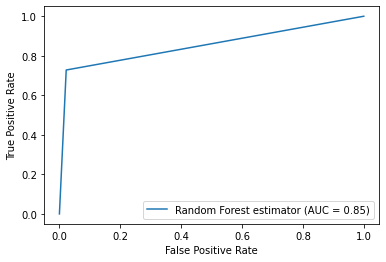

In [33]:
# call the 'roc_curve_func' for the predicted values our model generated
roc_curve_func(y_test, y_pred, 'Random Forest estimator')

The RFC model performs significantly better than our logistic regression and K-nearest algorithms. In this run, we have an AUC of 0.85 and a classification report that shows higher precision, recall, and f1-score across 'no default' and 'default' data points.

Revisiting feature importance, we can plot the input variables in order of importance according to the RFC algorithm. As mentioned, RFC models only use relevant predictors when generating trees. Hence, we should get a good representation of which variables are important for predicting `loan_status`.

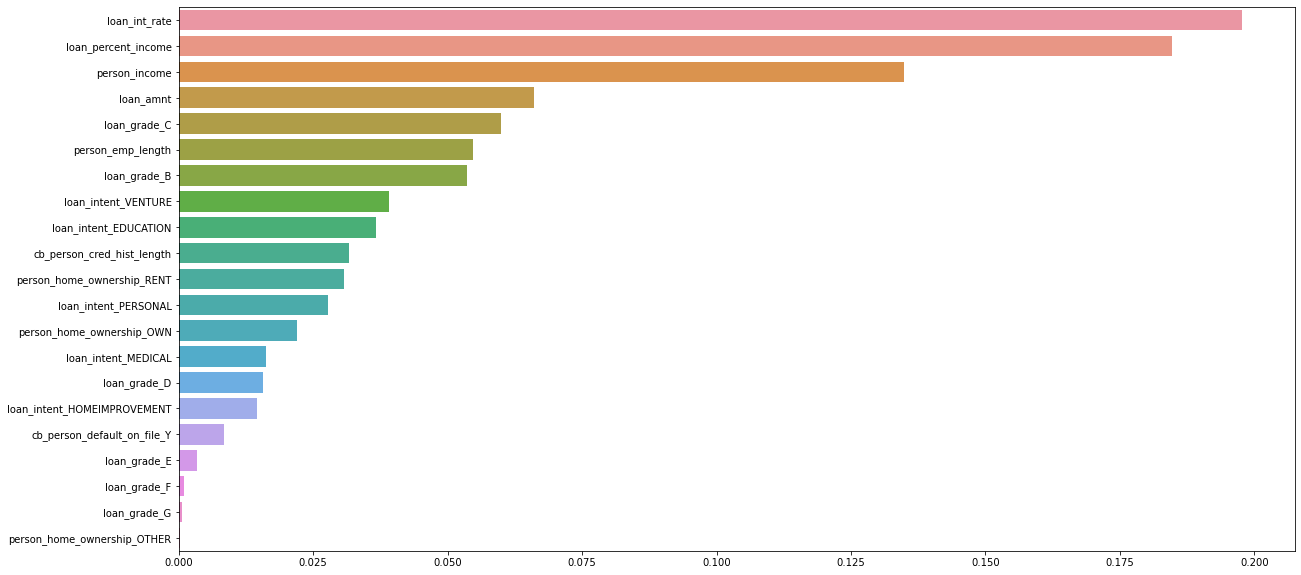

In [34]:
# define a series called 'forest_importances' and visualize the results
fig, ax = plt.subplots(figsize=(20,10))
importances = rfc.feature_importances_
forest_importances = pd.Series(importances, index=column_labels).sort_values(ascending=False)
f = sns.barplot(ax = ax, x = forest_importances, y = forest_importances.index)
plt.show()

At a glance, it's obvious that some important features include the loan interest rate, the loan as a percentage of income, the person's income, the loan amount, loan grades of B or C, etc.

Less relevant features include loan grades marked E, F, or G. Intuitively, this makes sense because loan grades with E, F, or G are already very low and it's unlikely that a lender will extend many loans of such a rating.

Though our RFC algorithm already performs well, we will conclude by testing one other algorithm called XGBoost.

### XGBoost
The XGBoost algorithm uses a sequential ensemble of tree models. All of the models are used to improve one another and return a final output. Since XGBoost is known for having many hyperparameters that can be adjusted, we'll start with a baseline and then tune the model to ensure we're using an optimized version. In the following cell we instantiate a XGBClassifier and evaluate just like before.

In [35]:
# import relevant libraries
import xgboost as xgb

# instantiate a XGBClassifier
xgb_clf = xgb.XGBClassifier()

# fit the resampled training data
xgb_clf.fit(X_train_sm, y_train_sm)

# create prediction values using the model
y_pred = xgb_clf.predict(X_test)

# evaluate the model with 'classification_report'
print(classification_report(y_test, y_pred, target_names=target_label))

              precision    recall  f1-score   support

  no default       0.93      0.98      0.96      7613
     default       0.91      0.75      0.82      2162

    accuracy                           0.93      9775
   macro avg       0.92      0.86      0.89      9775
weighted avg       0.93      0.93      0.93      9775



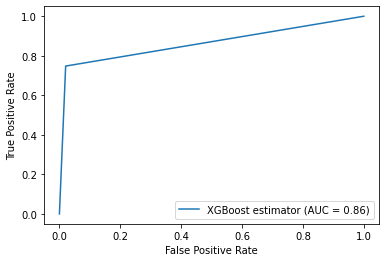

In [36]:
# call the 'roc_curve_func' for the predicted values our model generated
roc_curve_func(y_test, y_pred, 'XGBoost estimator')

The standard XGBClassifier already performs really well with an AUC of 0.86 and the majority of evaluation metrics over 90% across 0: 'no default' and 1: 'default'. Since XGBoost is known for having many hyperparameters, we will conduct a grid search to ensure that we're using an optimized version of the model.

In [37]:
# import relevant libraries
from sklearn.model_selection import RandomizedSearchCV

# define the model parameters to loop through
params = {'eta': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
         'booster': ['gbtree', 'gblinear', 'dart'],
         'alpha': [0, 0.01, 0.001, 0.0001]}

# initialize a random_search to get the best parameters
rs_xgb = RandomizedSearchCV(xgb_clf, params, cv=5, scoring='recall')
rs_xgb.fit(X_train_sm, y_train_sm)
print(rs_xgb.best_params_)

{'eta': 0.8, 'booster': 'dart', 'alpha': 0.01}


Now that we've hypertuned the model, we can instantiate another XGBClassifier with the best parameters we found. This will serve as our final model.

In [51]:
# instantiate a XGBClassifier with the best parameters we found from the grid search
xgb_clf2 = xgb.XGBClassifier(eta=0.8, booster='dart', alpha=0.01)

# fit the resampled training data
xgb_clf2.fit(X_train_sm, y_train_sm)

# create prediction values using the model
y_pred = xgb_clf2.predict(X_test)

# evaluate the model with 'classification_report'
print(classification_report(y_test, y_pred, target_names=target_label))

              precision    recall  f1-score   support

  no default       0.94      0.97      0.95      7613
     default       0.88      0.77      0.82      2162

    accuracy                           0.92      9775
   macro avg       0.91      0.87      0.89      9775
weighted avg       0.92      0.92      0.92      9775



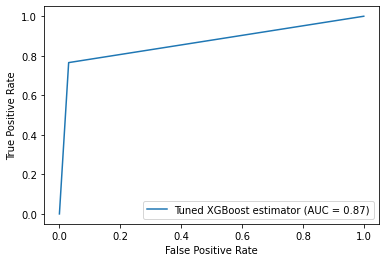

In [52]:
# call the 'roc_curve_func' for the predicted values our model generated
roc_curve_func(y_test, y_pred, 'Tuned XGBoost estimator')

The tuned XGBoost model performs slightly better with an AUC of 0.87. The 'default' recall score for the tuned XGBoost also increases by 0.02%, so we'll use the hypertuned version going forward.

### Summary of algorithms run
We'll make a table summarizing the four algorithms we've run so far along with their performance metrics. The next few cells use the cross_val_score() method on the different algorithms to return the average accuracy, precision, recall, and f1 score for each model. We display the results in a summary table.

In [40]:
# import relevant libraries
from sklearn.model_selection import cross_val_score

# calculate and store the logreg metrics
logreg_acc = cross_val_score(logreg_sm, X_train_sm, y_train_sm, scoring = 'accuracy').mean()
logreg_prec = cross_val_score(logreg_sm, X_train_sm, y_train_sm, scoring = 'precision').mean()
logreg_recall = cross_val_score(logreg_sm, X_train_sm, y_train_sm, scoring = 'recall').mean()
logreg_f1 = cross_val_score(logreg_sm, X_train_sm, y_train_sm, scoring = 'f1').mean()

In [41]:
# calculate and store the kNN metrics
kNN_acc = cross_val_score(kNN, X_train_sm, y_train_sm, scoring = 'accuracy').mean()
kNN_prec = cross_val_score(kNN, X_train_sm, y_train_sm, scoring = 'precision').mean()
kNN_recall = cross_val_score(kNN, X_train_sm, y_train_sm, scoring = 'recall').mean()
kNN_f1 = cross_val_score(kNN, X_train_sm, y_train_sm, scoring = 'f1').mean()

In [42]:
# calculate and store the rfc metrics
rfc_acc = cross_val_score(rfc, X_train_sm, y_train_sm, scoring = 'accuracy').mean()
rfc_prec = cross_val_score(rfc, X_train_sm, y_train_sm, scoring = 'precision').mean()
rfc_recall = cross_val_score(rfc, X_train_sm, y_train_sm, scoring = 'recall').mean()
rfc_f1 = cross_val_score(rfc, X_train_sm, y_train_sm, scoring = 'f1').mean()

In [54]:
# calculate and store the xgb metrics
xgb_acc = cross_val_score(xgb_clf2, X_train_sm, y_train_sm, scoring = 'accuracy').mean()
xgb_prec = cross_val_score(xgb_clf2, X_train_sm, y_train_sm, scoring = 'precision').mean()
xgb_recall = cross_val_score(xgb_clf2, X_train_sm, y_train_sm, scoring = 'recall').mean()
xgb_f1 = cross_val_score(xgb_clf2, X_train_sm, y_train_sm, scoring = 'f1').mean()

In [55]:
# Store all the information inside a list called 'summary_data'
summary_data = [['Logistic Regression', logreg_acc, logreg_prec, logreg_recall, logreg_f1], 
                ['kNN', kNN_acc, kNN_prec, kNN_recall, kNN_f1], 
                ['Random Forest', rfc_acc, rfc_prec, rfc_recall, rfc_f1],
                ['XGBoost', xgb_acc, xgb_prec, xgb_recall, xgb_f1]]

# Pass everything through a dataframe called 'summary'
summary = pd.DataFrame(summary_data, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
summary = round(summary, 2)
summary.set_index('Model', inplace=True)

# Display the table
summary

,Accuracy,Precision,Recall,F1
Model,,,,
Logistic Regression,0.72,0.71,0.75,0.72
kNN,0.83,0.81,0.86,0.83
Random Forest,0.94,0.97,0.90,0.93
XGBoost,0.94,0.96,0.92,0.94


### Final model: Hypertuned XGBoost
After going through several models and evaluating performance metrics, we'll use the tuned XGBoost as our final algorithm, as it clearly performs better than the others. The tuned XGBoost has parameters as follows:

`xgb.XGBClassifier(eta=0.8, booster='dart', alpha=0.01)`

Below is a confusion matrix, which summarizes the XGBoost's predictions in matrix form. In clockwise order, the plot shows true negatives, false positives, true positives, and false negatives. In our randomized search, we set the model to maximize recall score (equivalent to minimizing the number of false negatives, which is the value on the bottom left).

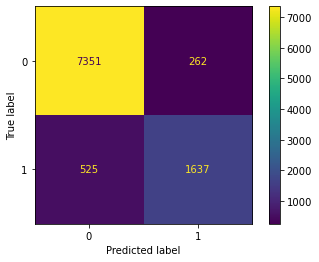

In [45]:
# import relevant libraries
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# instantiate a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = xgb_clf2.classes_)

# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_clf2.classes_)
disp.plot()

Finally, we will use the tuned XGBoost model to identify and plot feature importances, similar to what we did for Logistic Regression and K-neighbors. Using plot_importance(), we can visualize the columns and set the maximum number of features to 10 so we can identify the top 10 predictors. The graph will have F-score on the x-axis, which represents the number of times the variable was split on by the algorithm.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

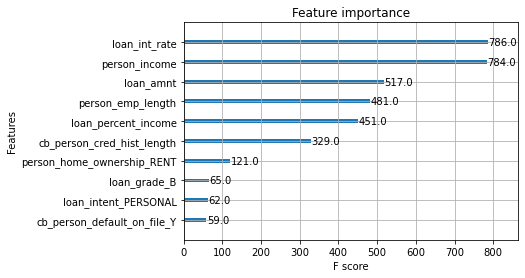

In [47]:
# import relevant libraries
from xgboost import plot_importance

# plot the features in order of importance and set the maximum number of features to 10
plot_importance(xgb_clf2, max_num_features = 10)

We've used the tuned XGBoost to identify the top 10 features for predicting customer default. To gauge the directional impact of each coefficient, we can look back at the logistic regression model to see if coefficients are positive or negative. If a predictor's coefficient is positive, that means an increase in the predictor will increase the likelihood that the given customer will have a `loan_status` of 1 (default). A predictor with a negative coefficient means that an increase in the predictor will decrease the likelihood that the given customer will have a `loan_status` of 1 and increase the likelihood that `loan_status` will be 0 (non-default).

In the next cell, we match the top 10 features from XGBoost with the coefficients that our Logistic Regression model returned. We visualize the features and their corresponding coefficients with a horizontal bar chart and put the results into a table.

In [29]:
# store the top 10 features in a list and match them with the coefficients from the LogisticRegression
top10_features = []
for i in range(0, len(labels_coef)):
    if labels_coef[i][0] in ['person_income', 'loan_int_rate', 'person_emp_length', 'loan_amnt', 'loan_percent_income',
               'cb_person_cred_hist_length', 'person_home_ownership_RENT', 'loan_grade_B',
               'cb_person_default_on_file_Y', 'loan_intent_PERSONAL']:
        top10_features.append(labels_coef[i])

# store the feature names and the coefficients in two different variables
feat, coef = zip(*top10_features)

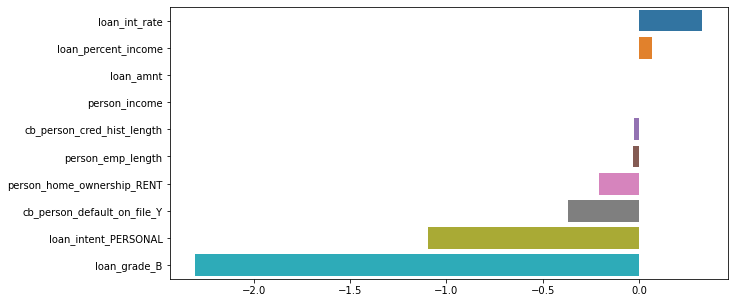

In [30]:
# plot the top 10 features we got from XGBoost and the corresponding coefficients we got from LogisticRegression
fig, ax = plt.subplots(figsize=(10,5))
final_fi = pd.Series(coef, index = feat).sort_values(ascending=False)
f = sns.barplot(ax = ax, x = final_fi, y = final_fi.index)
plt.show()

In [31]:
# display the top 10 features and coefficient results in a dataframe
feature_df = pd.DataFrame(final_fi, columns=['LogReg Coefficient'])
feature_df

,LogReg Coefficient
loan_int_rate,0.325748
loan_percent_income,0.064665
loan_amnt,0.000100
person_income,-0.000032
cb_person_cred_hist_length,-0.026780
person_emp_length,-0.032383
person_home_ownership_RENT,-0.207166
cb_person_default_on_file_Y,-0.368039
loan_intent_PERSONAL,-1.094342
loan_grade_B,-2.304052


To summarize, the top 10 features are:

1. `loan_int_rate`

2. `person_income`

3. `loan_amnt`

4. `person_emp_length`

5. `loan_percent_income`

6. `cb_person_cred_hist_length`

7. `person_home_ownership_RENT`

8. `loan_grade_B`

9. `loan_intent_PERSONAL`

10. `cb_person_default_on_file_Y`

In classifying a customer into default or non-default, lenders and financial institutions should focus on metrics such as interest rates and personal income. For instance, firms should be most concerned with customers who have high interest rates on their loans and low income levels. Additional attention should also be given to customers with certain traits, such as past credit defaults on file.

### Conclusion and recommendations
The optimal XGBoost model, tuned to minimize false negatives, for identifying credit defaults has the following parameters:

`xgb.XGBClassifier(eta=0.8, booster='dart', alpha=0.01)`

Of the 22 predictors that the algorithm used, the top 10 are: 

1. `loan_int_rate`

2. `person_income`

3. `loan_amnt`

4. `person_emp_length`

5. `loan_percent_income`

6. `cb_person_cred_hist_length`

7. `person_home_ownership_RENT`

8. `loan_grade_B`

9. `loan_intent_PERSONAL`

10. `cb_person_default_on_file_Y`

Based on the analysis, some suggestions to lenders and financial institutions for mitigating risk include:

* Reduce their exposure to loans with high interest rates
* Diversify the income levels of their clients, with a greater proportion of their clients having higher incomes
* Assess the face value of the loan taken against the proportion of the borrower's income
* Look at some other less-obvious features such as loan intent and home ownership status

### Next steps and future analyses
* Explore the impact of changing macro environments on credit defaults
* Analyze a dataset of customers who have defaulted to identify thereshold levels
* Conduct a credit analysis on businesses as many financial institutions invest in whole companies

### Contact information
* [E-mail]('mailto:kezia.setokusumo@stern.nyu.edu')
* [Github]('https://github.com/keziasetokusumo')
* [LinkedIn]('https://www.linkedin.com/in/keziasetokusumo/')